In [1]:
import suncet_psf
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

In [2]:
mesh = suncet_psf.filter_mesh_parameters(171, angle_arm = [0, 90] * u.deg)

In [3]:
mesh

{'wavelength': <Quantity 171. Angstrom>,
 'angle_arm': <Quantity [ 0., 90.] deg>,
 'error_angle_arm': <Quantity [0.02, 0.02] deg>,
 'spacing_e': <Quantity 0.57859746 pix>,
 'mesh_pitch': <Quantity 1269.9993142 um>,
 'mesh_width': <Quantity 65. um>,
 'spacing_fp': <Quantity 0.0067503 pix>,
 'width': <Quantity 1.62563562 pix>,
 'CDELT': [<Quantity 4.8 arcsec>, <Quantity 4.8 arcsec>],
 'Area': <Quantity 0.90025725>}

In [5]:
psf170 = suncet_psf.psf(170, diffraction_orders=np.arange(-200, 200, 1), angle_arm = [0, 90] * u.deg)
psf175 = suncet_psf.psf(175, diffraction_orders=np.arange(-200, 200, 1), angle_arm = [0, 90] * u.deg)
psf180 = suncet_psf.psf(180, diffraction_orders=np.arange(-200, 200, 1), angle_arm = [0, 90] * u.deg)
psf185 = suncet_psf.psf(185, diffraction_orders=np.arange(-200, 200, 1), angle_arm = [0, 90] * u.deg)
psf190 = suncet_psf.psf(190, diffraction_orders=np.arange(-200, 200, 1), angle_arm = [0, 90] * u.deg)

1.0000000000001001


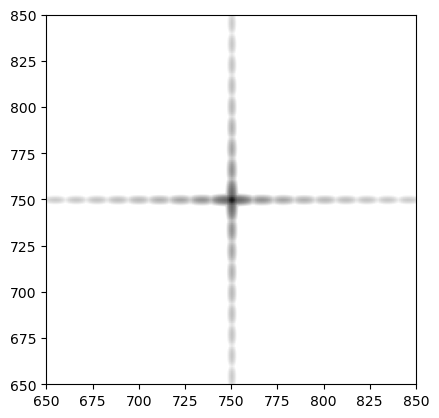

In [6]:
plt.imshow(np.log10(psf170[650:850, 650:850]), cmap='Greys', vmin=-8, vmax=0, extent =[650, 850, 650, 850])
print(np.sum(psf170))

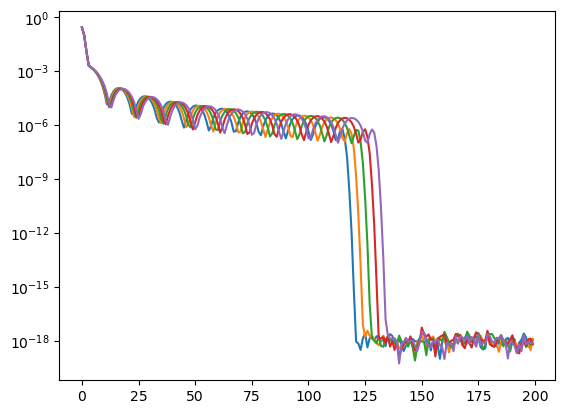

In [7]:
plt.plot(psf170[750, 750:950])
plt.plot(psf175[750, 750:950])
plt.plot(psf180[750, 750:950])
plt.plot(psf185[750, 750:950])
plt.plot(psf190[750, 750:950])
plt.yscale('log')

In [4]:
psf = suncet_psf.psf(170)

1.0000000000001057


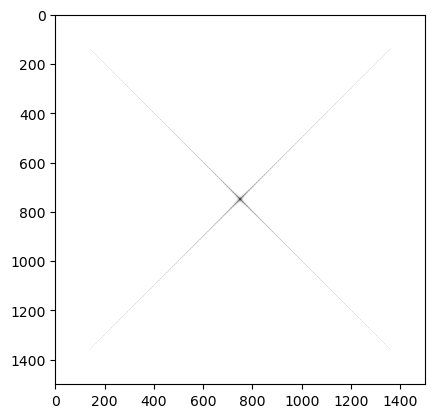

In [5]:
plt.imshow(np.log10(psf), cmap='Greys', vmin=-10, vmax=0-1)
print(np.sum(psf))

In [37]:
def make_header_template():
    from astropy.io import fits
    hdr = fits.Header( {
        "SIMPLE": "T",                   
        "BITPIX": -32,
        "NAXIS": 2,
        "NAXIS1": 1500,
        "NAXIS2": 1500,
        'WAVELNTH': 170.0, # NOTE: FITS doesn't have a keyword to store the units for wavelength, it's usually listed in the header comment instead
        'WAVEUNIT': 'Angstrom',
        'TELESCOP': 'SunCET',
        'INSTRUME': 'SunCET',
    } )
    return hdr

In [68]:
for wavelength in range(170, 211, 1):
    print(wavelength)
    psf = suncet_psf.psf(wavelength)
    header = make_header_template()
    header['WAVELNTH'] = wavelength
    if wavelength == 170:
        hdu = fits.PrimaryHDU(psf.value, header)
        hdul = fits.HDUList(hdu)
    else:
        hdu = fits.ImageHDU(psf.value, header)
        hdul.append(hdu)
hdul.writeto('suncet_diffraction_patterns.fits', overwrite=True) 